In [129]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [130]:
# Exercitiul 1

# a)
# - semnal sinusoidal
# - este shiftat cu 5 unitati in sus deci referinta devine 5
# => amplitudine = (7 - 3) / 2 = 2

# b)
# - aproape de 0,01, de 0,02, de 0,03, dupa 0,04, aproape de 0,06, la 0,07, etc.
# - unde avem varfuri sus sau jos

# c) valoarea componentei continue este media semnalului adica 5

# d) x(t) = 5 + 2 * cos(2 * pi * 40 * t)
# x0 = 5
# A = 2
# f0 = 40 Hz


In [131]:
# Exercitiul 2
trafic = np.genfromtxt('trafic.csv', delimiter='\n')
# a) semnalul este esantionat o data pe ora => o data la 3600 sec => 1/3600 esantioane/sec
fs = 1 / 3600  #Hz
# b) 18288 esantioane => 18288 ore => 762 zile => aproximativ 2 ani si o luna


In [132]:
# c) Frecventa maxima a semnalului este frecventa Niquist
# fs > f0 * 2
f_max = fs / 2
print(f"Frecventa maxima este {f_max}")

Frecventa maxima este 0.0001388888888888889


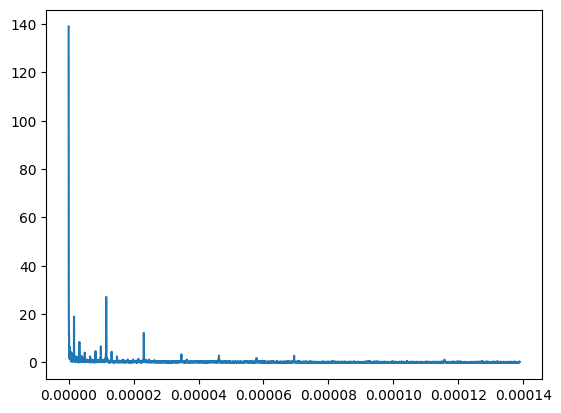

In [133]:
# d)
N = trafic.shape[0]
X = np.fft.fft(trafic)
X = abs(X / N)
X = X[:N // 2]

f = fs * np.linspace(0, N // 2, N // 2) / N

plt.plot(f, X)
plt.show()


In [134]:
# e) Daca media semnalului e diferita de 0 prezinta o componenta continua
medie_trafic = np.mean(X)
print(medie_trafic)

# Media e diferita de 0 => contine o component continua
# Scadem componenta continua din valorile traficului
#
print(X)
X -= medie_trafic
print(X)


0.3250510341100147
[138.95811461  66.85385766  35.21917298 ...   0.39618267   0.41367487
   0.37676309]
[1.38633064e+02 6.65288066e+01 3.48941219e+01 ... 7.11316323e-02
 8.86238359e-02 5.17120568e-02]


In [135]:
# f)

# sortam descrescator si pastram indicii
X_sorted = np.argsort(X)
X_sorted = X_sorted[::-1]

# print(X_sorted)

first_index = X_sorted[0]
second_index = X_sorted[1]
third_index = X_sorted[2]
forth_index = X_sorted[3]

f1 = f[first_index]
f2 = f[second_index]
f3 = f[third_index]
f4 = f[forth_index]

# primele 4 cele mai mari valori ale modulului transformatei
print(X[first_index], X[second_index], X[third_index], X[forth_index])
# frecventele (ı̂n Hz) carora le corespund
print(f1, f2, f3, f4)

perioada1 = 1 / f1 if f1 != 0 else 0
perioada1 = perioada1 / 3600 # in ore

perioada2 = 1 / f2 if f2 != 0 else 0
perioada2 = perioada2 / 3600

perioada3 = 1 / f3 if f3 != 0 else 0
perioada3 = perioada3 / 3600

perioada4 = 1 / f4 if f4 != 0 else 0
perioada4 = perioada4 / 3600

print(perioada1, perioada2, perioada3, perioada4)

138.63306357656367 66.52880662982447 34.89412194382688 26.776971253505547
0.0 1.5190734866989925e-08 3.038146973397985e-08 1.1575339968646325e-05
0.0 18286.0 9143.0 23.997375328083987


168
1344


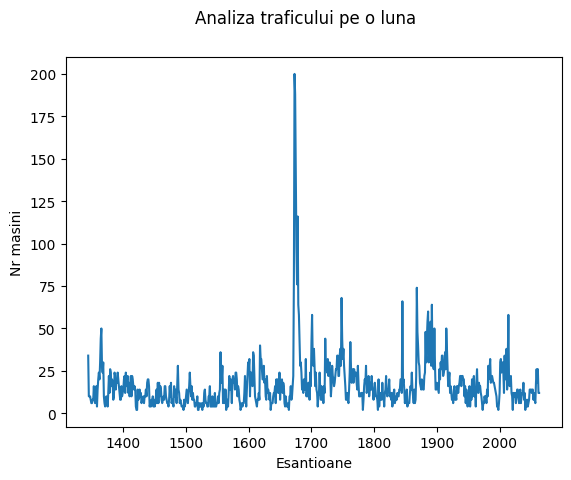

In [138]:
# g)
# din Figura 3 si explicatiile sale stim ca masuratoarea traficului a inceput intr o luni
# intr-o saptamana avem 168 esantioane
esantioane_sapt = 7 * 24
print(esantioane_sapt)

print(168 * 8)  # 8 saptamani

# incepem masuratoarea in lunea din a noua saptamana
esantion_start = 1344

# o luna de trafic = 4 saptamani ~= 30 zile de trafic pe care le vom analiza
# adica 30 * 24 esantioane
esantion_stop = esantion_start + 30 * 24

perioada = np.arange(esantion_start, esantion_stop, 1)

trafic_analiza = trafic[esantion_start : esantion_stop]

fig, axs = plt.subplots(1)
fig.suptitle("Analiza traficului pe o luna")
plt.plot(perioada, trafic_analiza)
plt.xlabel("Esantioane")
plt.ylabel("Nr masini")
plt.show()


In [137]:
# h) Putem analiza semnalul pe zile comparandu-l cu zilele libere din orasul unde a fost realizata masuratoarea. Documentand toate zilele libere (in care ar trebui sa fie mai putin trafic) stim distanta (in zile) dintre acestea si o putem pozitiona undeva pe grafic. Pentru ca semnalul este masurat in peste doi ani, avem doi ani de verificare a acestor match-uri cu vacantele.

# Dezavantajele metodei ar fi ca pot exista situatii neprevazute in care sa fi fost zile libere nationale (din cauza temperaturii, a grevelor, a diferitor festivitati etc.) ce ne pot induce in eroare.

# Astfel, acuratetea metodei depinde de vreme, diverse manifestatii din oras, efectuarea diverselor lucrari in intersectie etc.